<a href="https://colab.research.google.com/github/SAB-6/Parkinsons_Disease_Prediction/blob/master/Parkinsons__Telemonitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parkinson Disease Prediction**

_Author **Shereef Bankole**_
<br/> **LinkedIn click** <a href="https://www.linkedin.com/in/shereef-b-b9aab823/">Here<a/>
<br/> **Github click**  <a href= "https://github.com/SAB-6">Here<a/>

**Source of the data click** <a href=https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring>Here<a/>

## Import required packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from tensorflow.keras import layers

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [130]:
# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ddh7bkzh
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-ddh7bkzh
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=77819 sha256=dc1d56f6075f53090ee1e0c2b80afa8e3f786afa7de0d5ab83291057e0873d91
  Stored in directory: /tmp/pip-ephem-wheel-cache-tk9z4h2m/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [0]:
from google.colab import files
uploaded = files.upload()

Saving parkinsons_updrs.csv to parkinsons_updrs.csv


## Exploratory data analysis

In [0]:
data= pd.read_csv('parkinsons_updrs.csv')

In [0]:
data.head()

subject#  age  sex  test_time  ...     HNR     RPDE      DFA      PPE
0         1   72    0     5.6431  ...  21.640  0.41888  0.54842  0.16006
1         1   72    0    12.6660  ...  27.183  0.43493  0.56477  0.10810
2         1   72    0    19.6810  ...  23.047  0.46222  0.54405  0.21014
3         1   72    0    25.6470  ...  24.445  0.48730  0.57794  0.33277
4         1   72    0    33.6420  ...  26.126  0.47188  0.56122  0.19361

[5 rows x 22 columns]

In [0]:
data.tail()

subject#  age  sex  test_time  ...     HNR     RPDE      DFA      PPE
5870        42   61    0     142.79  ...  22.369  0.64215  0.55314  0.21367
5871        42   61    0     149.84  ...  22.886  0.52598  0.56518  0.12621
5872        42   61    0     156.82  ...  25.065  0.47792  0.57888  0.14157
5873        42   61    0     163.73  ...  24.422  0.56865  0.56327  0.14204
5874        42   61    0     170.73  ...  23.259  0.58608  0.57077  0.15336

[5 rows x 22 columns]

In [0]:
data.isna().sum().sort_values()

subject#         0
RPDE             0
HNR              0
NHR              0
Shimmer:DDA      0
Shimmer:APQ11    0
Shimmer:APQ5     0
Shimmer:APQ3     0
Shimmer(dB)      0
Shimmer          0
Jitter:DDP       0
Jitter:PPQ5      0
Jitter:RAP       0
Jitter(Abs)      0
Jitter(%)        0
total_UPDRS      0
motor_UPDRS      0
test_time        0
sex              0
age              0
DFA              0
PPE              0
dtype: int64

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
subject#         5875 non-null int64
age              5875 non-null int64
sex              5875 non-null int64
test_time        5875 non-null float64
motor_UPDRS      5875 non-null float64
total_UPDRS      5875 non-null float64
Jitter(%)        5875 non-null float64
Jitter(Abs)      5875 non-null float64
Jitter:RAP       5875 non-null float64
Jitter:PPQ5      5875 non-null float64
Jitter:DDP       5875 non-null float64
Shimmer          5875 non-null float64
Shimmer(dB)      5875 non-null float64
Shimmer:APQ3     5875 non-null float64
Shimmer:APQ5     5875 non-null float64
Shimmer:APQ11    5875 non-null float64
Shimmer:DDA      5875 non-null float64
NHR              5875 non-null float64
HNR              5875 non-null float64
RPDE             5875 non-null float64
DFA              5875 non-null float64
PPE              5875 non-null float64
dtypes: float64(19), int64(3)
memory usag

### Attributes

**subject#** - Integer that uniquely identifies each subject
<br/> **age** - Subject age
<br/>**sex** - Subject gender '0' - male, '1' - female
<br>**test_time** - Time since recruitment into the trial. The integer part is the number of days since recruitment.
<br>**motor_UPDRS** - Clinician's motor UPDRS score, linearly interpolated
<br>**total_UPDRS** - Clinician's total UPDRS score, linearly interpolated
<br> **Jitter(%)**,**Jitter(Abs)**,**Jitter:RAP**,**Jitter:PPQ5**,**Jitter:DDP** - Several measures of variation in fundamental frequency
<br>**Shimmer**,**Shimmer(dB)**,**Shimmer:APQ3**,**Shimmer:APQ5**,**Shimmer:APQ11**,**Shimmer:DDA** - Several measures of variation in amplitude
**NHR,HNR** - Two measures of ratio of noise to tonal components in the voice
<br>**RPDE** - A nonlinear dynamical complexity measure
<br>**DFA** - Signal fractal scaling exponent
<br>**PPE** - A nonlinear measure of fundamental frequency variation

In [0]:
data_new=data.drop(['subject#','test_time'], axis=1)
data_new.head()

age  sex  motor_UPDRS  total_UPDRS  ...     HNR     RPDE      DFA      PPE
0   72    0       28.199       34.398  ...  21.640  0.41888  0.54842  0.16006
1   72    0       28.447       34.894  ...  27.183  0.43493  0.56477  0.10810
2   72    0       28.695       35.389  ...  23.047  0.46222  0.54405  0.21014
3   72    0       28.905       35.810  ...  24.445  0.48730  0.57794  0.33277
4   72    0       29.187       36.375  ...  26.126  0.47188  0.56122  0.19361

[5 rows x 20 columns]

In [0]:
#Summary statistics
dataset=data[:]
dataset.describe()

subject#          age  ...          DFA          PPE
count  5875.000000  5875.000000  ...  5875.000000  5875.000000
mean     21.494128    64.804936  ...     0.653240     0.219589
std      12.372279     8.821524  ...     0.070902     0.091498
min       1.000000    36.000000  ...     0.514040     0.021983
25%      10.000000    58.000000  ...     0.596180     0.156340
50%      22.000000    65.000000  ...     0.643600     0.205500
75%      33.000000    72.000000  ...     0.711335     0.264490
max      42.000000    85.000000  ...     0.865600     0.731730

[8 rows x 22 columns]

## **Correlation**

In [0]:
target = ['motor_UPDRS', 'total_UPDRS']
correlation=dataset.corr()
correlation[target]

motor_UPDRS  total_UPDRS
subject#          0.252919     0.253643
age               0.273665     0.310290
sex              -0.031205    -0.096559
test_time         0.067918     0.075263
motor_UPDRS       1.000000     0.947231
total_UPDRS       0.947231     1.000000
Jitter(%)         0.084816     0.074247
Jitter(Abs)       0.050903     0.066927
Jitter:RAP        0.072684     0.064015
Jitter:PPQ5       0.076291     0.063352
Jitter:DDP        0.072698     0.064027
Shimmer           0.102349     0.092141
Shimmer(dB)       0.110076     0.098790
Shimmer:APQ3      0.084261     0.079363
Shimmer:APQ5      0.092105     0.083467
Shimmer:APQ11     0.136560     0.120838
Shimmer:DDA       0.084260     0.079363
NHR               0.074967     0.060952
HNR              -0.157029    -0.162117
RPDE              0.128607     0.156897
DFA              -0.116242    -0.113475
PPE               0.162433     0.156195

## Heat map

In [0]:
def Heat_map(data, features):
    plt.figure(figsize=(20, 10))
    sns.heatmap(data[features].corr(), cmap='RdBu', annot=True)
    plt.xticks(rotation=45) 
    plt.title('Heatmap of Correlation Matrix')

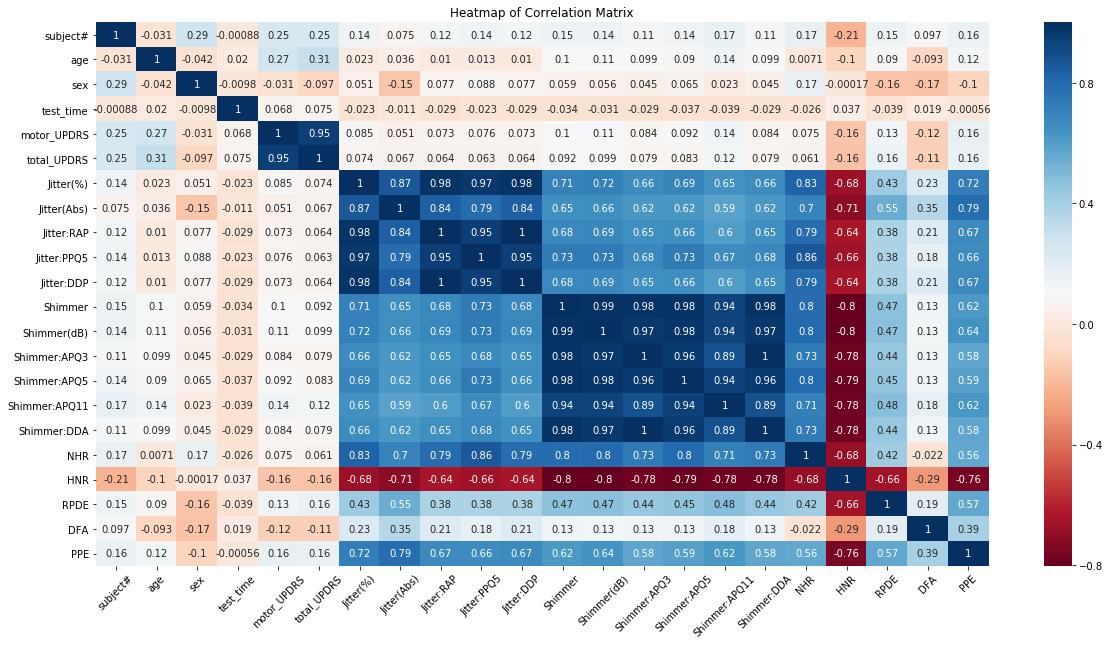

In [0]:
data = dataset
features = list(dataset.columns) 
Heat_map(data, features)

## Split data into train and test sets

In [0]:
train_set = data.sample(frac=0.7, random_state = 42)
test_set = data.drop(train_set.index)
print('Number of train set is : {} \nNumber of test set is : {}'.format(train_set.shape[0], test_set.shape[0]))

Number of train set is : 4112 
Number of test set is : 1763


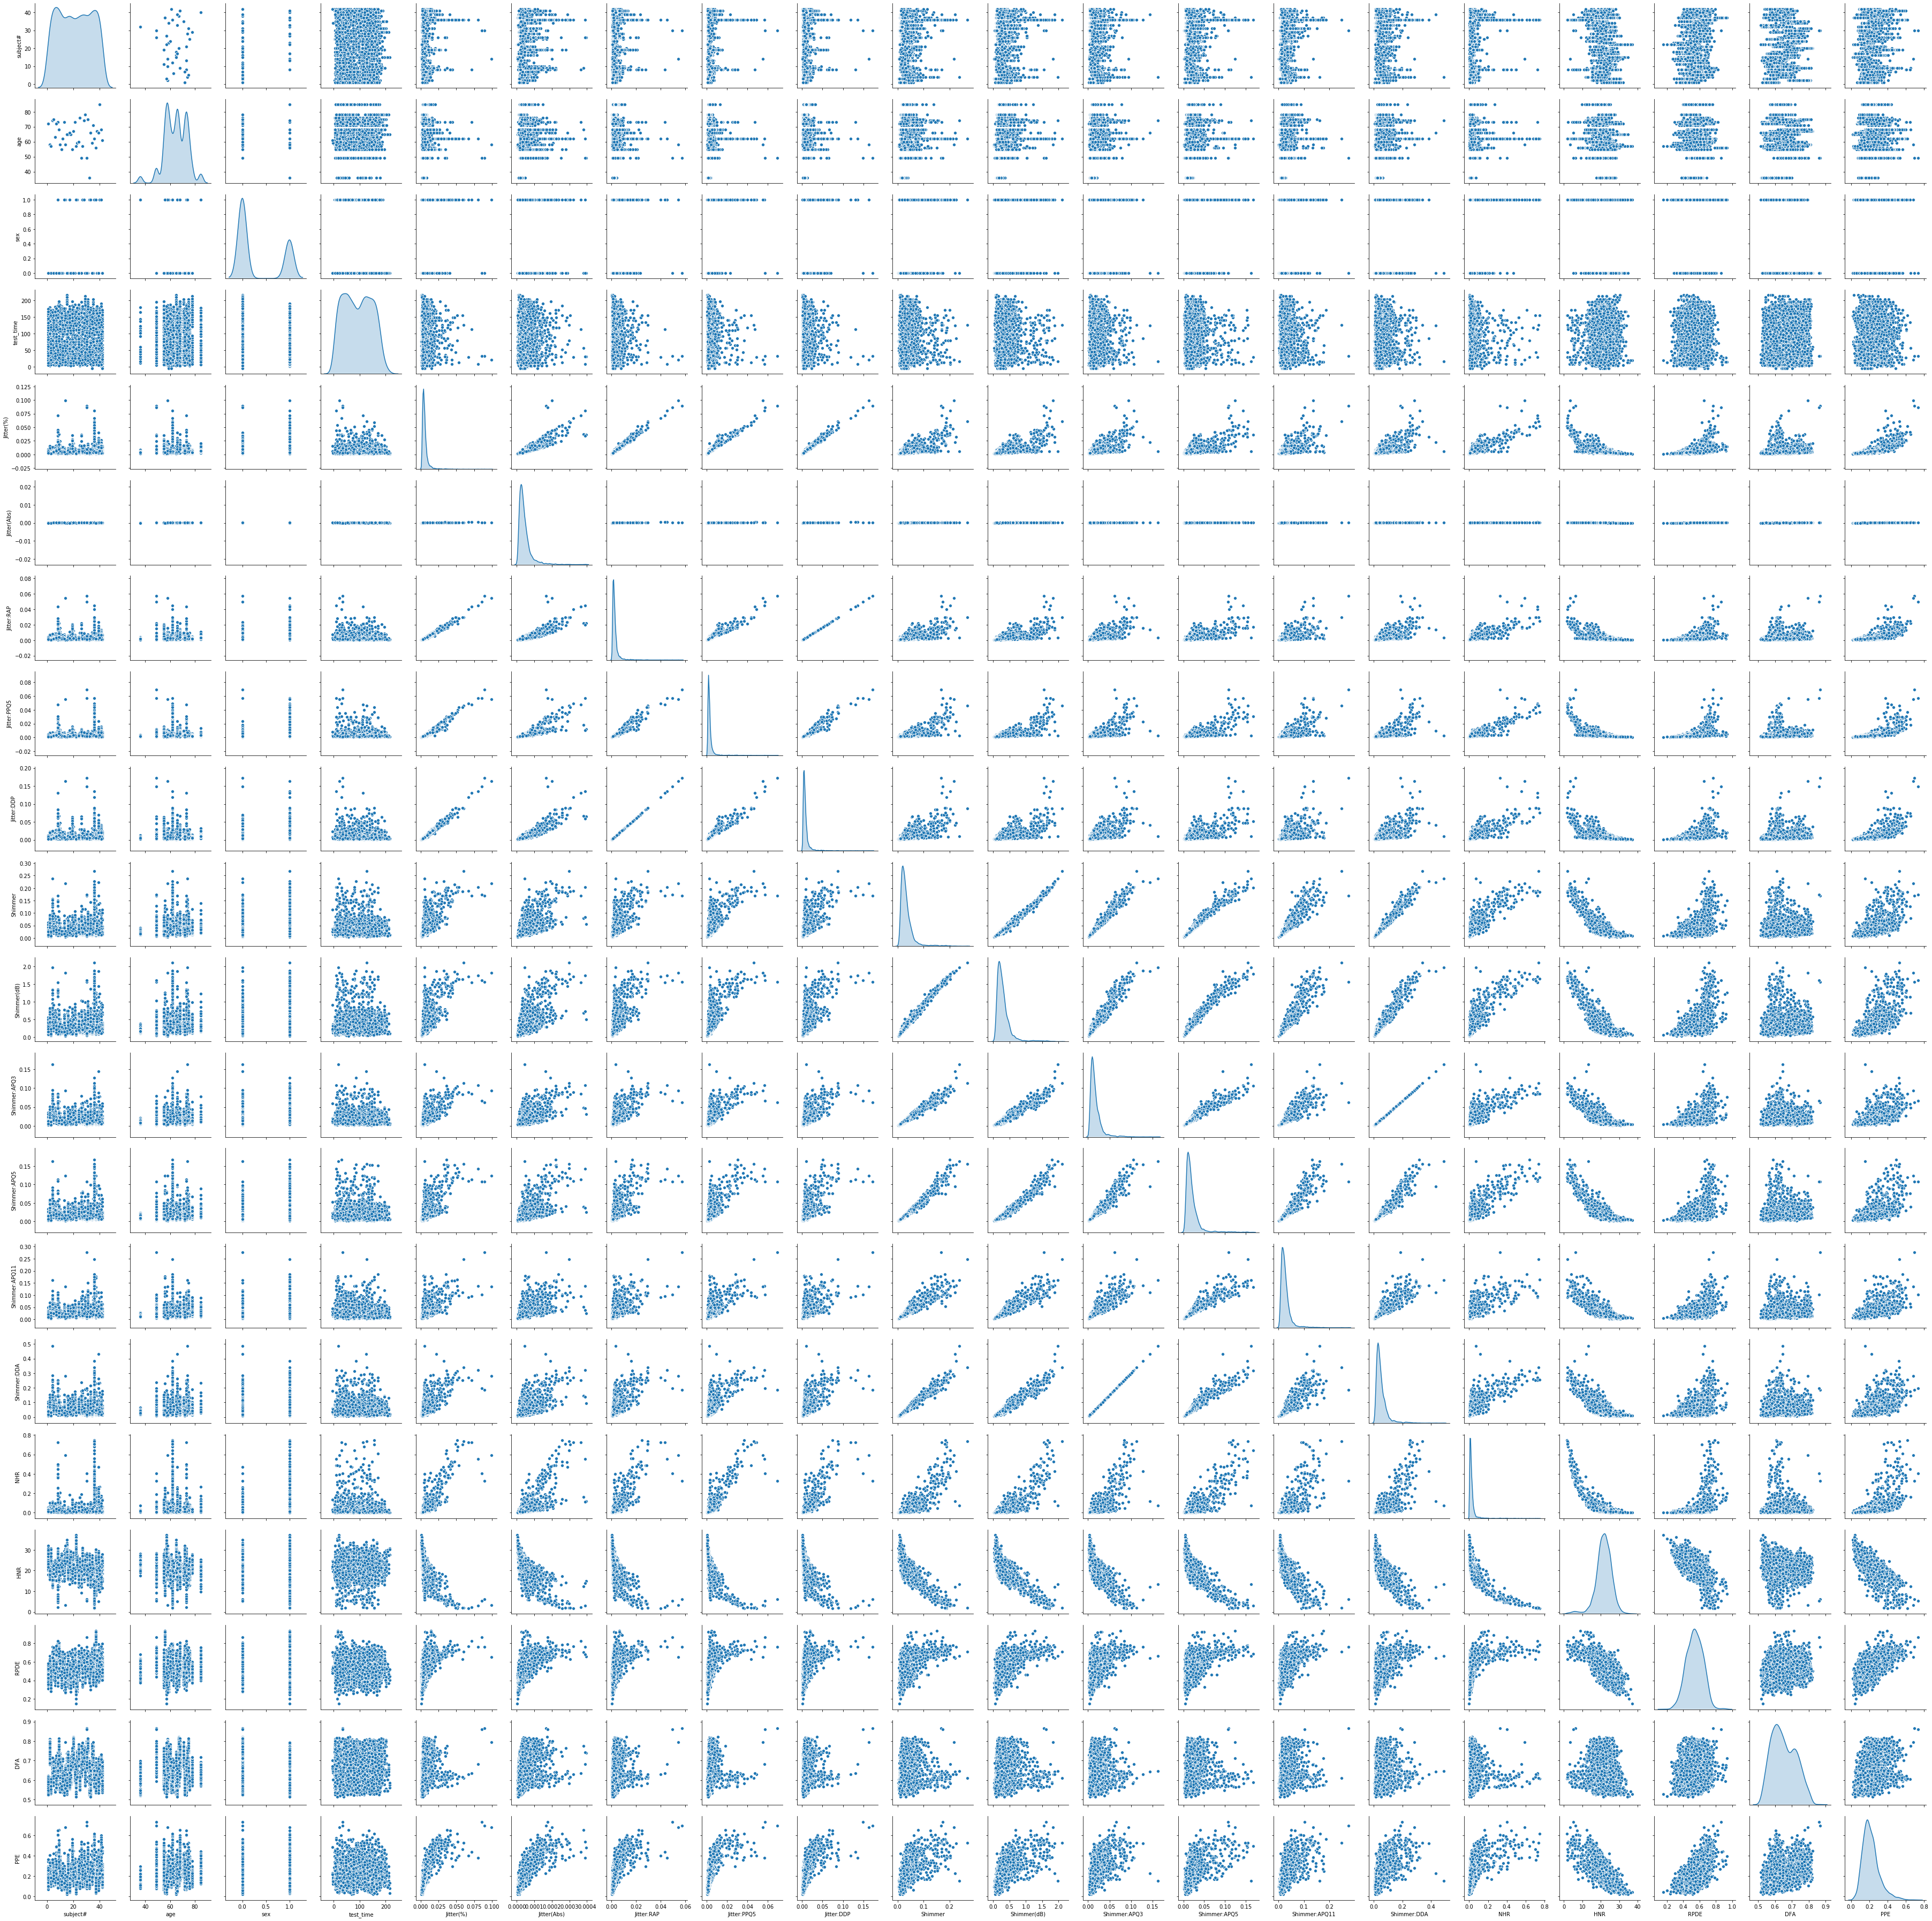

In [0]:
train_features=train_set.drop(['motor_UPDRS','total_UPDRS'], axis=1)
_ = sns.pairplot(train_features, diag_kind='kde')

## Correlation between the two target variables motor UPDRS and total UPDRS

In [0]:
train_set[['motor_UPDRS','total_UPDRS']].corr()

motor_UPDRS  total_UPDRS
motor_UPDRS      1.00000      0.94736
total_UPDRS      0.94736      1.00000

## **Data Preprocessing**

## Drop a feature having correaltion greater than 90% with another feature in the data

In [0]:
columnid = list(train_features.columns)
correlation = train_features.corr()
high_corr = []

for c1 in columnid:
  for c2 in columnid:
      if (c1 != c2) and (c1 not in high_corr) and correlation[c1][c2] > 0.9: 
            high_corr.append(c2)

print('These features have high colinearity with one or more features in the data \n {}:\n'.format(high_corr))

print('Dopping high colinearity features')
train_features_new = train_features.drop(high_corr, axis=1).reset_index(drop=True)
train_features_new.head()


These features have high colinearity with one or more features in the data 
 ['Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA']:

Dopping high colinearity features


subject#  age  sex  test_time  ...     HNR     RPDE      DFA      PPE
0        39   66    0    138.400  ...  23.543  0.49315  0.64472  0.14389
1        32   36    1    143.780  ...  23.979  0.53244  0.63642  0.23252
2         2   58    0     10.815  ...  18.384  0.49252  0.75548  0.23707
3        24   60    0     39.828  ...  14.349  0.78034  0.78442  0.34791
4        36   62    1    103.310  ...   6.092  0.71957  0.58285  0.46459

[5 rows x 12 columns]

In [0]:
#Training labels
train_label_1 = train_set['motor_UPDRS'].reset_index(drop=True)
train_label_2 = train_set['total_UPDRS'].reset_index(drop=True)
print('Label 1:\n {}\n \n Label 2 {}'.format(train_label_1.head(),train_label_2.head()))

Label 1:
 0    33.0840
1     7.1599
2    11.2180
3    12.7590
4    25.3910
Name: motor_UPDRS, dtype: float64
 
 Label 2 0    43.563
1    12.060
2    14.109
3    16.517
4    32.000
Name: total_UPDRS, dtype: float64


In [0]:
#Test data
column_drop=['motor_UPDRS', 'total_UPDRS']
for lst in high_corr:
  column_drop.append(lst)

test_features = test_set.drop(column_drop,axis=1)
test_label = test_set[['motor_UPDRS', 'total_UPDRS']]
print('Test_features:\n',test_set_new.head())
print('\nTest label:\n', test_label.head())

Test_features:
    subject#  age  sex  test_time  ...     HNR     RPDE      DFA      PPE
1         1   72    0     12.666  ...  27.183  0.43493  0.56477  0.10810
2         1   72    0     19.681  ...  23.047  0.46222  0.54405  0.21014
3         1   72    0     25.647  ...  24.445  0.48730  0.57794  0.33277
4         1   72    0     33.642  ...  26.126  0.47188  0.56122  0.19361
5         1   72    0     40.652  ...  22.946  0.53949  0.57243  0.19500

[5 rows x 12 columns]

Test label:
    motor_UPDRS  total_UPDRS
1       28.447       34.894
2       28.695       35.389
3       28.905       35.810
4       29.187       36.375
5       29.435       36.870


In [0]:
train_label_1.values.reshape(-1,1)

array([[33.084 ],
       [ 7.1599],
       [11.218 ],
       ...,
       [17.    ],
       [24.311 ],
       [28.654 ]])

## Normalise training set

In [0]:
#Data required normalisation or standardization for neural network to perform well
#Here MinMax was used to normalise the dat to between 0 and 1

feature_scaler = MinMaxScaler(feature_range=(0,1))
target_scaler = MinMaxScaler(feature_range=(0,1))

normalised_train_features = feature_scaler.fit_transform(train_features_new)

normalised_train_label_1 = target_scaler.fit_transform(train_label_1.values.reshape(-1,1))
normalised_train_label_2 = target_scaler.fit_transform(train_label_2.values.reshape(-1,1))
print('Training features normalised')
print('Shape :', normalised_train_features.shape)

normalised_test_features = feature_scaler.transform(test_features)
normalised_test_label_1 = target_scaler.transform(test_set['motor_UPDRS'].values.reshape(-1,1))
normalised_test_label_1 = target_scaler.transform(test_set['total_UPDRS'].values.reshape(-1,1))

print('\nTest labels have been normalised')
print('Shape: ', normalised_test_features.shape)
print('\n**Note the features were normalised by multiplying by {} and adding {}'.format(target_scaler.scale_[0], target_scaler.min_[0]))



Training features normalised
Shape : (4112, 12)

Test labels have been normalised
Shape:  (1763, 12)

**Note the features were normalised by multiplying by 0.020836806134355727 and adding -0.14585764294049008


## Model

### Build and complie model

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[features_number]),
    layers.Dense(64, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(1)
    ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

### Train model

In [0]:
model = build_model()

In [126]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1664      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                3250      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 13,221
Trainable params: 13,221
Non-trainable params: 0
_________________________________________________________________


In [144]:
#For motor_UPDRS
history_1 = model.fit(
  normalised_train_features, train_label_1 ,
  epochs=training_epochs, validation_split = 0.2, verbose=0,
   callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:211.9272,  mean_absolute_error:11.9183,  mean_squared_error:211.9271,  val_loss:56.0524,  val_mean_absolute_error:6.4213,  val_mean_squared_error:56.0524,  
....................................................................................................

In [145]:
#For motor_UPDRS
history_2 = model.fit(
  normalised_train_features, train_label_2 ,
  epochs=training_epochs, validation_split = 0.2, verbose=0,
   callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:13.6524,  mean_absolute_error:2.7382,  mean_squared_error:13.6524,  val_loss:11.7620,  val_mean_absolute_error:2.4875,  val_mean_squared_error:11.7620,  
....................................................................................................

### Visualise the trained model

In [146]:
#motor_UPDRS
hist = pd.DataFrame(history_1.history)
hist['epoch'] = history_1.epoch
hist.tail()

loss  mean_absolute_error  ...  val_mean_squared_error  epoch
95  3.228431             1.239014  ...                3.673994     95
96  3.253432             1.231977  ...                4.907763     96
97  3.079745             1.196457  ...                3.734083     97
98  3.056521             1.195710  ...                5.599486     98
99  3.125834             1.220692  ...                3.721519     99

[5 rows x 7 columns]

In [147]:
#Total_UPDRS
hist = pd.DataFrame(history_2.history)
hist['epoch'] = history_2.epoch
hist.tail()

loss  mean_absolute_error  ...  val_mean_squared_error  epoch
95  2.635982             1.091386  ...                3.921005     95
96  2.773347             1.131151  ...                3.499470     96
97  2.636746             1.116290  ...                4.473475     97
98  2.640525             1.089567  ...                6.339353     98
99  2.681794             1.113930  ...                5.620355     99

[5 rows x 7 columns]

Text(0, 0.5, 'Mean absolute error [motor_UPDRS]')

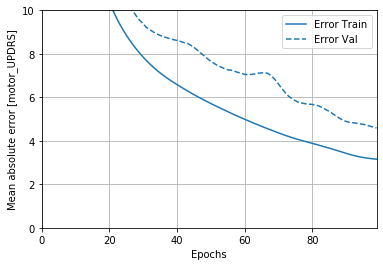

In [148]:
#motor_UPDRS
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Error': history_1}, metric = "mean_squared_error")
plt.ylim([0, 10])
plt.ylabel('Mean absolute error [motor_UPDRS]')

Text(0, 0.5, 'Mean absolute error [total_UPDRS]')

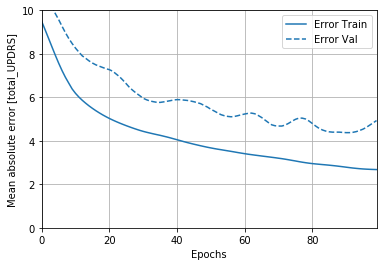

In [149]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Error': history_2}, metric = "mean_squared_error")
plt.ylim([0, 10])
plt.ylabel('Mean absolute error [total_UPDRS]')

## Prediction

Text(0, 0.5, 'Predictions [motor_UPDRS]')

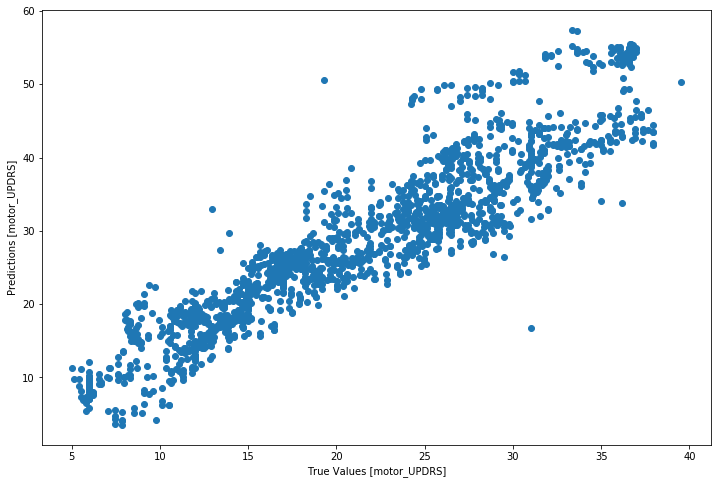

In [162]:
#Prediction for motor_UPDRS
test_predictions = model.predict(normalised_test_features).flatten()
plt.figure(figsize=(12,8))
plt.scatter(test_set['motor_UPDRS'], test_predictions)
plt.xlabel('True Values [motor_UPDRS]')
plt.ylabel('Predictions [motor_UPDRS]')

Text(0, 0.5, 'Predictions [Total_UPDRS]')

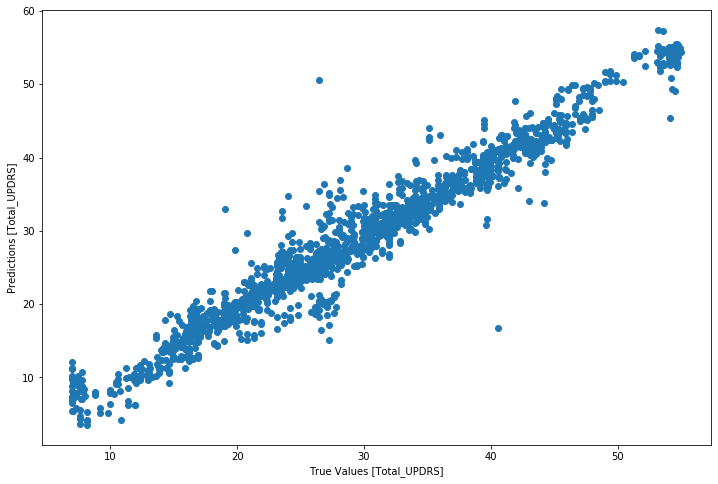

In [163]:
#Prediction for Total_UPDRS
test_predictions = model.predict(normalised_test_features).flatten()
plt.figure(figsize=(12,8))
plt.scatter(test_set['total_UPDRS'], test_predictions)
plt.xlabel('True Values [Total_UPDRS]')
plt.ylabel('Predictions [Total_UPDRS]')